# Inference Test Code

In [1]:
# Get tensorflow verison
import tensorflow as tf
tf.__version__

/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorboar

'2.2.0'

In [2]:
# Import libraries
import numpy as np
#from PIL import Image
import tensorflow as tf
import imageio
from IPython.display import Image
from IPython.display import HTML

In [3]:
# Preprocess input image
x = tf.io.read_file("../imgs/input.png")
x = tf.image.decode_png(x, channels=3)
x = tf.cast(x, tf.float32)
x = tf.expand_dims(x, axis=0)

In [4]:
# Load model
model = tf.saved_model.load("../upscaler_model")
y = model(x)

# Save model
#tf.saved_model.save(model, 'model')

In [5]:
# Postprocess output of the model
y = tf.clip_by_value(y, 0, 255)
y = tf.round(y)
y = tf.cast(y, tf.uint8)

In [6]:
# Save the output image
imageio.imwrite('../imgs/outfile.png', np.array(y[0]) )

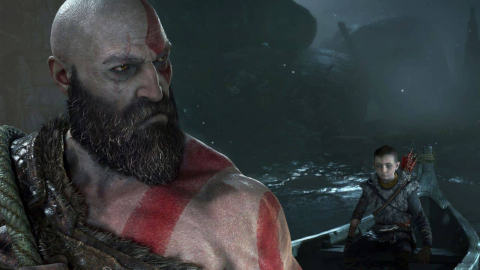

In [7]:
# Display input image
Image(filename='../imgs/input.png') 

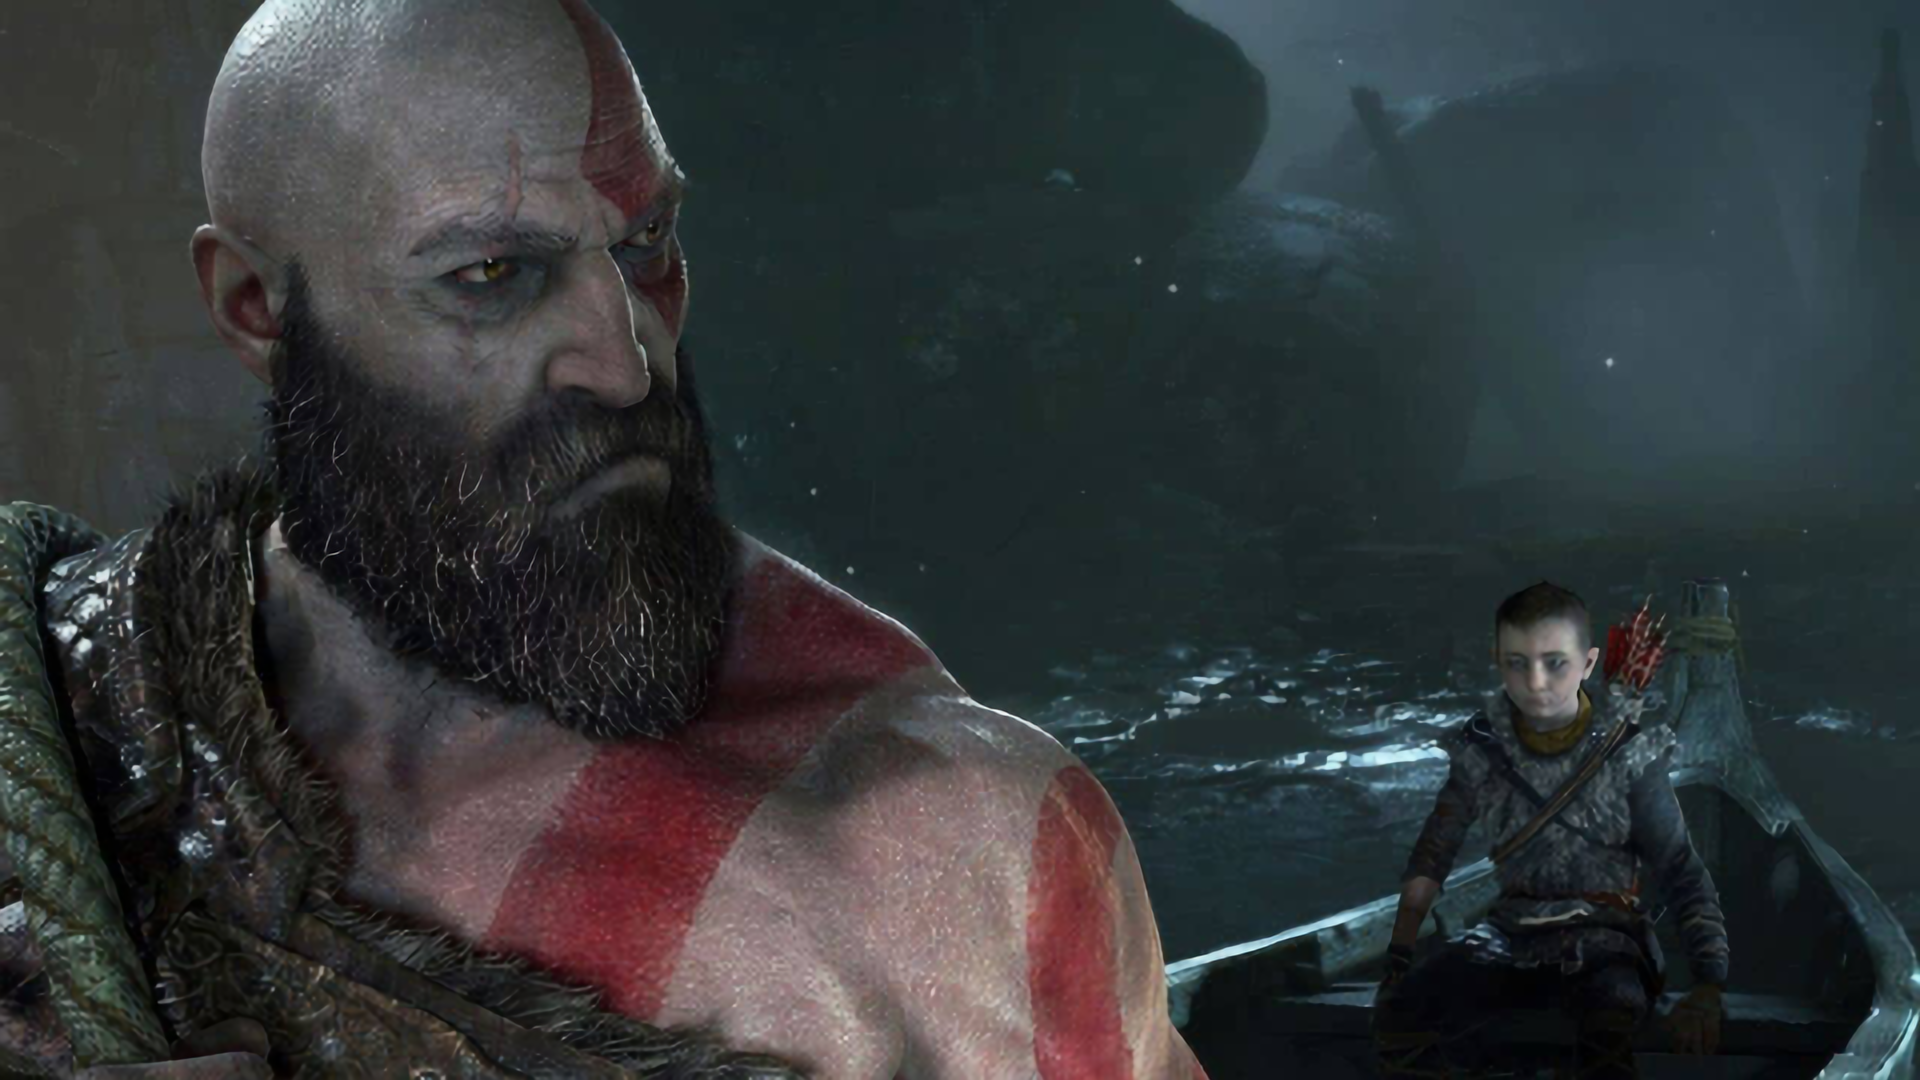

In [8]:
# Display output image
Image(filename='../imgs/outfile.png')

In [9]:
# Display Input Video
HTML("""
    <video alt="test" controls>
        <source src="../videos/big_buck_bunny.mp4" type="video/mp4">
    </video>
""")

In [10]:
# Display Output Video (Processed via myUpsampler.cc)
HTML("""
    <video alt="test" controls>
        <source src="../videos/output.mp4" type="video/mp4">
    </video>
""")